<br>
<br>

<p style='color:red;'><b>본 실습 중 다뤄지는 코드의 경우 Anaconda가 C drive가 아닌 다른 파티션에 설치된 분들은 일부 소스코드가 정상적으로 작동하지 않을 수 있습니다.</b></p>

<br>
<br>

## 1. 텍스트 데이터 분석을 위한 라이브러리 설치 및 세팅

<br>

### 1-1) NLTK 설치

- Text Processing을 위한 라이브러리인 **nltk** library(Natural Language Toolkit)를 설치 및 세팅합니다.

In [56]:
# NLTK는 Anaconda 설치 시 이미 설치되어 있으므로 별도 설치가 불필요합니다.
# !pip install nltk==3.6.1

# Test processing을 위해 nltk package 를 import
import nltk

아래 명령어를 통해 download 대화상자를 열어 패키지를 다운로드 받아야 합니다.
<br>인터넷 속도 저하 시 매우 오래 걸리므로, 패키지 설치 경로만 확인한 다음 \[ (nltk, downloaded) nltk_data.zip ] 의 파일들을 복사합니다.
<br><br>경로 예시 : **"C:\Users\{컴퓨터 이름}\AppData\Roaming\nltk_data"**
<br>
**<p style='color:red;'>nltk_data 폴더 안에 corpora, taggers, tokenizers 폴더가 바로 위치하도록 복사해줘야 합니다.</p>**

In [57]:
# nltk.download()  # 텍스트 데이터 처리를 위한 패키지 다운로더

# Download following packages
# Corpora : stopwords, wordnet
# Models : averaged_perceptron_tagger, maxnet_treebank_pos_tagger, punkt

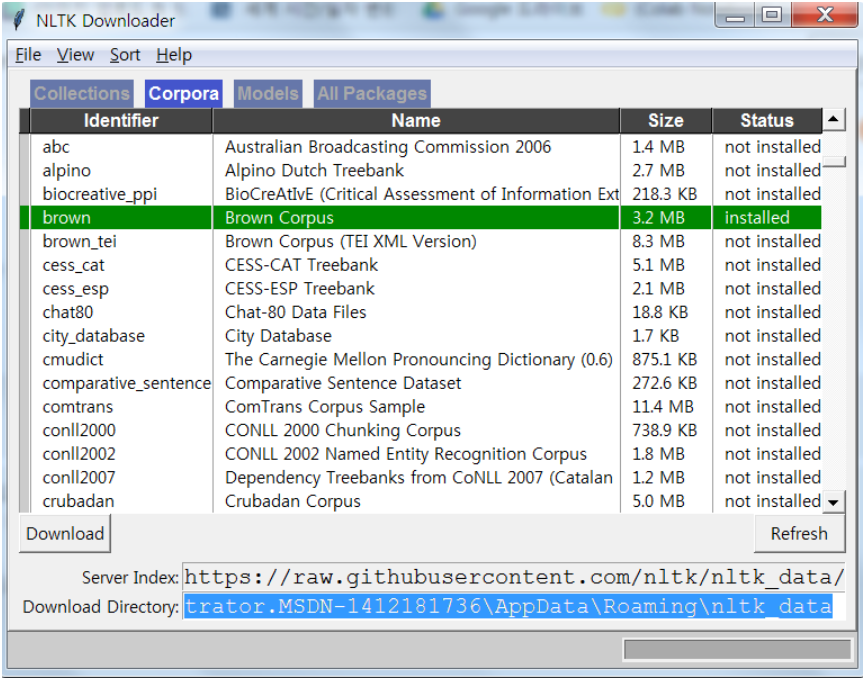

<br>

### 1-2) NLTK 테스트

In [59]:
# 전처리하고자 하는 문장을 String 변수로 저장한다
sentence = 'NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.'

# 각 문장을 토큰화한 결과를 출력한다
nltk.word_tokenize(sentence)[:10]  # 문장을 '단어 수준에서' 토큰화해 출력한다 

['NLTK',
 'is',
 'a',
 'leading',
 'platform',
 'for',
 'building',
 'Python',
 'programs',
 'to']

<br>

### 1-3) Konlpy 설치

#### 1) Microsoft Build Tools 2015 를 설치합니다.

- http://j.mp/30ToU8g 에서 **BuildTools_Full.exe** 파일을 다운로드 후 설치해주세요!
<br><br>

#### 2) Java SE Development Kit (JDK) 를 설치합니다.

- 기존에 **Java 혹은 JDK가 설치되어 있을 시 삭제** 후 설치를 진행해주세요. 
- http://j.mp/30TopLq 에서 **jdk-8u221-windows-x64.exe** 파일을 다운로드 후 설치해주세요! 
<br>(설치 폴더 위치를 포함하여 기본 설정을 모두 그대로 유지한 채 설치해주셔야 합니다.)
- Mac OS 사용자는 http://j.mp/2lBBj1h 에서 OS 버전에 맞는 설치 파일을 다운로드하여 설치합니다.
<br><br>

#### 3) 설치가 완료되면 아래 3개의 셀을 차례대로 실행하여 JPype1과 konlpy를 설치하고, tweepy를 다운그레이드해줍니다.

In [ ]:
# JPype1 1.2.0 버전으로 설치를 진행합니다. (cp38 == Python 3.8.x version)
# Mac OS 사용자는 https://pypi.org/project/JPype1/1.2.0/#files 에서 OS 버전에 맞는 .whl 파일을 다운로드합니다. (이미 포함되어 있습니다.)

!pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

In [ ]:
# "액세스가 거부되었습니다" 에러 발생 시,
# cmd(명령프롬프트) 우클릭 & 관리자권한으로 실행 후,
# "pip install konlpy==0.5.2"를 입력 및 실행하여 설치를 진행합니다.

!pip install konlpy==0.5.2

In [ ]:
# "액세스가 거부되었습니다" 에러 발생 시,
# cmd(명령프롬프트) 우클릭 & 관리자권한으로 실행 후,
# "pip install tweepy==3.10.0"를 입력 및 실행하여 다운그레이드를 진행합니다. (참고 @ https://doitgrow.com/27)

!pip install tweepy==3.10.0

<br>
<br>

### 1-4) Konlpy 테스트
<br>

- <p style='color:red;'> <b>RuntimeError</b> 발생 시 <a href='https://bit.ly/3kIAhdE'>https://bit.ly/3kIAhdE</a> 의 내용을 따라 Java 환경변수를 설정한 다음, <b>Jupyter notebook을 완전히 재시작 후 실행</b>해주세요.</p>
- **JVM** 관련 에러 발생 시 위에서 설치한 Java SE Development Kit (JDK)를 삭제한 다음 재설치하고 재부팅해주세요.
- **msvcr100.dll** 관련 에러가 발생할 경우 http://bit.ly/3hcGImT 에서 [Microsoft Visual C++ 2010 재배포 가능 패키지]를 받아 설치해주세요.
- 문제가 해결되지 않을 경우 바로 다음 셀의 코드를 실행해 pickle 파일로부터 Tokenizing & POS tagging이 완료된 데이터를 불러와서 2-3) 부터 실습을 시작해주세요.

In [1]:
# Konlpy 라이브러리가 정상적으로 작동하는지 확인합니다.
from konlpy.tag import Okt

tokenizer = Okt()
tokens = tokenizer.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(tokens)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [ ]:
# konlpy 설치 및 실행 불가 시, 
# 아래 코드를 통해 Tokenizing & POS tagging이 완료된 데이터를 불러오고 2-3)부터 실습을 시작해주세요.

# import os, pickle 

# 파이썬 변수를 pickle 파일로 저장하는 방법 
# with open('raw_pos_tagged.pkl', 'wb') as f:
#     pickle.dump(raw_pos_tagged, f) 

# pickle 파일로부터 파이썬 변수를 불러오는 방법 
# with open('raw_pos_tagged.pkl','rb') as f:
#     data = pickle.load(f)
# -> "ran out of input" 문제 발생 시 아래 코드로 대신 실행
    
# data = [] 
# if os.path.getsize('raw_pos_tagged.pkl') > 0:      
#     with open('raw_pos_tagged.pkl', "rb") as f:
#         unpickler = pickle.Unpickler(f)
#         data = unpickler.load()
# data

<br>
<br>

## 2. 크롤링 데이터 전처리

In [3]:
import numpy as np
import pandas as pd

<br>

### 2-1) 크롤링 데이터 불러오기

In [4]:
df = pd.read_excel('result_220202_1834.xlsx')
df.head()

,Title,Date,Article,URL,PressCompany
0,"인천테크노파크, 중소기업 빅데이터 지원사업 '우수' 등급",2022.02.02. 오전 10:09,[인천=뉴시스] 이루비 기자 = 인천테크노파크 로고. (이미지=인천테크노파크 제공...,https://news.naver.com/main/read.naver?mode=LS...,뉴시스
1,"식약처, 식·의약 데이터 분석 플랫폼 구축",2022.02.01. 오전 8:28,[KBS 청주]식품의약품안전처는 오는 4월부터 식·의약 데이터를 모은 분석 플랫폼을...,https://news.naver.com/main/read.naver?mode=LS...,KBS
2,"2촌까지 가능한 유전자 분석기술 도입될까…""실종자 가족 희망""",2022.02.01. 오전 7:16,유전자[게티이미지뱅크 제공] (서울=연합뉴스) 이정현 기자 = 실종자 확인 시...,https://news.naver.com/main/read.naver?mode=LS...,연합뉴스
3,"길영준 휴이노 대표 ""2월 원격 모니터링 시장 첫발…최대 규모 임상 데이터 확보 목표""",2022.02.01. 오전 10:01,이달부터 심전도 장기검사 보험 신설휴이노 최대 4000명 규모 임상 계획홀터 검사 ...,https://news.naver.com/main/read.naver?mode=LS...,서울경제
4,“빅데이터 잘 쓰면 매출 2배도 가능해요”,2022.01.28. 오전 11:18,"KT, 소상공인 빅데이터 성공 사례 공유상권분석 플랫폼 ‘잘나가게’ 활용법 오픈KT...",https://news.naver.com/main/read.naver?mode=LS...,헤럴드경제


In [5]:
articles = df['Article'].tolist()
len(articles)

60

In [6]:
s = 'python is easy'
result = s.split()
print(result)

new_result = '___'.join(result)
print(new_result)

['python', 'is', 'easy']
python___is___easy


In [7]:
articles = ''.?(articles) # 리스트의 아이템들을 특정한 문자를 기준으로 이어 붙이기
articles[:1000]

'[인천=뉴시스] 이루비 기자 =  인천테크노파크 로고. (이미지=인천테크노파크 제공)[인천=뉴시스] 이루비 기자 = 인천테크노파크는 \'중소기업 빅데이터 분석·활용 지원사업\' 전국 평가에서 \'우수\' 등급을 받았다고 2일 밝혔다. 이 지원사업은 중소기업과 빅데이터 분석 솔루션을 보유한 데이터 전문기업을 연결해 기업의 빅데이터 분석·활용을 돕는 것으로, 인천TP는 지난 2020년부터 한국지능정보사회진흥원(NIA)의 공모에 2년 연속 선정돼 사업을 추진해 왔다.인천TP는 지난해 사업비 5억원을 들여 전문성 부족과 비용 문제 등으로 빅데이터 활용에 어려움을 겪고 있는 인천지역 28개 중소기업에 데이터 전문기업의 맞춤형 컨설팅을 지원, 기업 성장을 이끌었다.스마트 가로등 개발업체 ㈜에코란트는 인천TP의 빅데이터 분석·활용 지원을 바탕으로 매출이 두배 넘게 늘었으며, 유아용품 전문 제조업 ㈜제이엠아이엔티엘은 신제품 출시를 앞당겼다. 이사 플랫폼 서비스 제공기업 ㈜모두플랫폼과 공기압 기기 국내 최대 제조업체 ㈜TPC메카트로닉스, 유압 실린더 개발 기업 우영유압㈜은 생산관리 효율성 향상으로 시장경쟁력을 높였다. 운동 어플 서비스 개발업체 ㈜버닛과 AI(인공지능) 기반 폐기물 분류 시스템 개발 기업 ㈜에이트테크는 작업효율 높이면서 투자유치에 성공, 사세 확장을 꾀하고 있다.인천TP 관계자는 "이 지원사업을 통해 기업들이 새로운 비즈니스 기회를 창출하면서 경쟁력을 키워나가고 있다"며 "인천지역 기업들의 데이터 활용 활성화와 비즈니스 모델 전환 등을 지속해서 지원할 계획"이라고 말했다．[KBS 청주]식품의약품안전처는 오는 4월부터 식·의약 데이터를 모은 분석 플랫폼을 구축하기 위한 사업을 추진한다고 밝혔습니다.유전자[게티이미지뱅크 제공]    (서울=연합뉴스) 이정현 기자 = 실종자 확인 시 2촌 이상 가족 간에도 유전자 분석을 할 수 있는 신기술 도입이 장기 과제로 추진된다.    1일 연합뉴스 취재를 종합하면 경찰은 기존 1촌끼리만 가능했던 가족 간 유전자 분석을 2촌

<br>

### 2-2) 단어 정규화 및 어근화, 품사 태깅

In [8]:
# input data 에 품사를 태깅(tagging)합니다.
# 이 때, stem 및 norm 옵션의 기능은 다음과 같습니다.

# norm == 정규화(normalization)
# 한국어를 처리하는 예시입니닼ㅋㅋㅋ -> 한국어를 처리하는 예시입니다ㅋㅋ

# stem == 어근화(stemming)
# 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle

from konlpy.tag import Okt

tokenizer = Okt()
raw_pos_tagged = tokenizer.?(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged

[('[', 'Punctuation'),
 ('인천', 'Noun'),
 ('=', 'Punctuation'),
 ('뉴시스', 'Noun'),
 (']', 'Punctuation'),
 ('이', 'Determiner'),
 ('루비', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('인천', 'Noun'),
 ('테크노', 'Noun'),
 ('파크', 'Noun'),
 ('로고', 'Noun'),
 ('.', 'Punctuation'),
 ('(', 'Punctuation'),
 ('이미지', 'Noun'),
 ('=', 'Punctuation'),
 ('인천', 'Noun'),
 ('테크노', 'Noun'),
 ('파크', 'Noun'),
 ('제공', 'Noun'),
 (')[', 'Punctuation'),
 ('인천', 'Noun'),
 ('=', 'Punctuation'),
 ('뉴시스', 'Noun'),
 (']', 'Punctuation'),
 ('이', 'Determiner'),
 ('루비', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('인천', 'Noun'),
 ('테크노', 'Noun'),
 ('파크', 'Noun'),
 ('는', 'Josa'),
 ("'", 'Punctuation'),
 ('중소기업', 'Noun'),
 ('빅데이터', 'Noun'),
 ('분석', 'Noun'),
 ('·', 'Punctuation'),
 ('활용', 'Noun'),
 ('지원', 'Noun'),
 ('사업', 'Noun'),
 ("'", 'Punctuation'),
 ('전국', 'Noun'),
 ('평가', 'Noun'),
 ('에서', 'Josa'),
 ("'", 'Punctuation'),
 ('우수', 'Noun'),
 ("'", 'Punctuation'),
 ('등급', 'Noun'),
 ('을', 'Josa'),
 ('받다', 'Verb'),
 

<br>

### 2-3) 단어 등장 빈도 카운팅

In [9]:
# 정규화 및 어근화를 마치고 품사 태깅까지 마친 상태에서,
# 조사, 어미, 구두점을 제외한 나머지 단어들을 모두 word_cleaned 리스트에 담습니다.
# 이 때에는 여러번 나온 단어들도 복수 허용되어 여러번 리스트에 담기게 됩니다.

# 유의미한 의미를 갖고 있지 않은 단어를 제외할 수 있습니다.
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (?(word[0]) != 1) & (word[0] not in ?): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['인천',
 '뉴시스',
 '루비',
 '기자',
 '인천',
 '테크노',
 '파크',
 '로고',
 '이미지',
 '인천',
 '테크노',
 '파크',
 '제공',
 '인천',
 '뉴시스',
 '루비',
 '기자',
 '인천',
 '테크노',
 '파크',
 '중소기업',
 '빅데이터',
 '분석',
 '활용',
 '지원',
 '사업',
 '전국',
 '평가',
 '우수',
 '등급',
 '받다',
 '2일',
 '밝히다',
 '사업',
 '중소기업',
 '빅데이터',
 '분석',
 '솔루션',
 '보유',
 '데이터',
 '기업',
 '연결하다',
 '기업',
 '빅데이터',
 '분석',
 '활용',
 '돕다',
 '인천',
 'TP',
 '늘다',
 '지난',
 '2020년',
 '한국',
 '지능',
 '정보사회',
 '진흥',
 'NIA',
 '공모',
 '2년',
 '연속',
 '선정',
 '사업',
 '추진',
 '오다',
 '인천',
 'TP',
 '늘다',
 '지난해',
 '사업',
 '5억원',
 '들이다',
 '전문성',
 '부족',
 '비용',
 '문제',
 '빅데이터',
 '활용',
 '어려움',
 '겪다',
 '인천',
 '지역',
 '28',
 '중소기업',
 '데이터',
 '기업',
 '맞춤',
 '컨설팅',
 '지원',
 '기업',
 '성장',
 '이끌다',
 '스마트',
 '가로등',
 '개발',
 '업체',
 '에코',
 '틀다',
 '인천',
 'TP',
 '빅데이터',
 '분석',
 '활용',
 '지원',
 '바탕',
 '매출',
 '넘다',
 '늘다',
 '유아',
 '용품',
 '전문',
 '제조업',
 '이엠',
 '아이',
 '신제품',
 '출시',
 '앞당기다',
 '이사',
 '플랫폼',
 '서비스',
 '공기업',
 '모두',
 '플랫폼',
 '기압',
 '기기',
 '국내',
 '최대',
 '제조업체',
 'TPC',
 '메카트로닉스',
 '유압',
 '실린더',
 '개발',
 '기업',
 '우영',
 '유

In [10]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'인천': 15,
 '뉴시스': 13,
 '루비': 2,
 '기자': 20,
 '테크노': 3,
 '파크': 3,
 '로고': 1,
 '이미지': 12,
 '제공': 85,
 '중소기업': 19,
 '빅데이터': 115,
 '분석': 252,
 '활용': 102,
 '지원': 50,
 '사업': 86,
 '전국': 11,
 '평가': 26,
 '우수': 6,
 '등급': 2,
 '받다': 31,
 '2일': 1,
 '밝히다': 50,
 '솔루션': 49,
 '보유': 22,
 '데이터': 538,
 '기업': 96,
 '연결하다': 3,
 '돕다': 11,
 'TP': 4,
 '늘다': 71,
 '지난': 20,
 '2020년': 15,
 '한국': 37,
 '지능': 34,
 '정보사회': 1,
 '진흥': 7,
 'NIA': 1,
 '공모': 9,
 '2년': 6,
 '연속': 3,
 '선정': 16,
 '추진': 43,
 '오다': 41,
 '지난해': 60,
 '5억원': 1,
 '들이다': 5,
 '전문성': 4,
 '부족': 1,
 '비용': 8,
 '문제': 5,
 '어려움': 3,
 '겪다': 5,
 '지역': 62,
 '28': 1,
 '맞춤': 20,
 '컨설팅': 9,
 '성장': 28,
 '이끌다': 9,
 '스마트': 24,
 '가로등': 1,
 '개발': 89,
 '업체': 20,
 '에코': 2,
 '틀다': 4,
 '바탕': 15,
 '매출': 12,
 '넘다': 7,
 '유아': 2,
 '용품': 3,
 '전문': 15,
 '제조업': 1,
 '이엠': 1,
 '아이': 1,
 '신제품': 3,
 '출시': 9,
 '앞당기다': 2,
 '이사': 19,
 '플랫폼': 59,
 '서비스': 154,
 '공기업': 1,
 '모두': 9,
 '기압': 1,
 '기기': 5,
 '국내': 23,
 '최대': 10,
 '제조업체': 1,
 'TPC': 1,
 '메카트로닉스': 1,
 '유압': 2,
 '실린더': 1,
 '우영': 1,


In [ ]:
# # 위 cell에서의 작업과 동일한 작업을 아래의 코드로 대체할 수 있습니다.

# from collections import Counter
# result = Counter(word_cleaned)
# word_dic = dict(result)
# word_dic

#### -> You can preceed to [3. 워드클라우드 만들기] from here.

In [ ]:
word_dic.items()

In [11]:
# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬합니다.

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('데이터', 538),
 ('분석', 252),
 ('서비스', 154),
 ('빅데이터', 115),
 ('활용', 102),
 ('기업', 96),
 ('기술', 93),
 ('개발', 89),
 ('사업', 86),
 ('고객', 86),
 ('제공', 85),
 ('통해', 83),
 ('늘다', 71),
 ('디지털', 70),
 ('시스템', 69),
 ('기반', 68),
 ('지역', 62),
 ('AI', 61),
 ('금융', 61),
 ('지난해', 60),
 ('플랫폼', 59),
 ('시장', 59),
 ('관리', 56),
 ('혁신', 51),
 ('다양하다', 51),
 ('지원', 50),
 ('밝히다', 50),
 ('대표', 50),
 ('산업', 50),
 ('솔루션', 49),
 ('카드', 49),
 ('위해', 48),
 ('구축', 46),
 ('올해', 46),
 ('계획', 45),
 ('가다', 45),
 ('마이', 45),
 ('서울', 44),
 ('정보', 44),
 ('크다', 44),
 ('추진', 43),
 ('분야', 43),
 ('코로나', 43),
 ('환경', 43),
 ('오다', 41),
 ('대한', 41),
 ('이번', 40),
 ('공공', 40),
 ('상품', 40),
 ('높다', 39),
 ('보험', 38),
 ('범죄', 38),
 ('한국', 37),
 ('투자', 37),
 ('전환', 37),
 ('KT', 37),
 ('새롭다', 35),
 ('자산', 35),
 ('지능', 34),
 ('증가', 34),
 ('예정', 33),
 ('개방', 33),
 ('경제', 32),
 ('결과', 32),
 ('받다', 31),
 ('비즈니스', 31),
 ('전략', 31),
 ('19', 31),
 ('통합', 31),
 ('많다', 31),
 ('LG', 31),
 ('예측', 30),
 ('따르다', 30),
 ('평균', 30),
 ('미래', 30),
 ('

In [12]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같습니다.

# ('데이터', 538),
for word, count in sorted_word_dic[:50]:
    print("{0}({1})".format(word, count), end=" ")

데이터(538) 분석(252) 서비스(154) 빅데이터(115) 활용(102) 기업(96) 기술(93) 개발(89) 사업(86) 고객(86) 제공(85) 통해(83) 늘다(71) 디지털(70) 시스템(69) 기반(68) 지역(62) AI(61) 금융(61) 지난해(60) 플랫폼(59) 시장(59) 관리(56) 혁신(51) 다양하다(51) 지원(50) 밝히다(50) 대표(50) 산업(50) 솔루션(49) 카드(49) 위해(48) 구축(46) 올해(46) 계획(45) 가다(45) 마이(45) 서울(44) 정보(44) 크다(44) 추진(43) 분야(43) 코로나(43) 환경(43) 오다(41) 대한(41) 이번(40) 공공(40) 상품(40) 높다(39) 

<br>

### 2-4) 단어 등장 빈도 시각화

In [13]:
# matplot 에서 한글을 표시하기 위한 설정입니다.
# 맑은고딕 대신 나눔고딕 폰트를 사용하려면 [나눔고딕파일] 폴더의 파일들을 복사하여, C drive -> Windows -> Fonts 폴더 안에 붙여넣기합니다.

import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 위치를 넣어주세요 (위에서 나눔고딕 파일을 해당 경로에 복사붙여넣기 했을 경우 그대로 실행하셔도 무방합니다.)
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

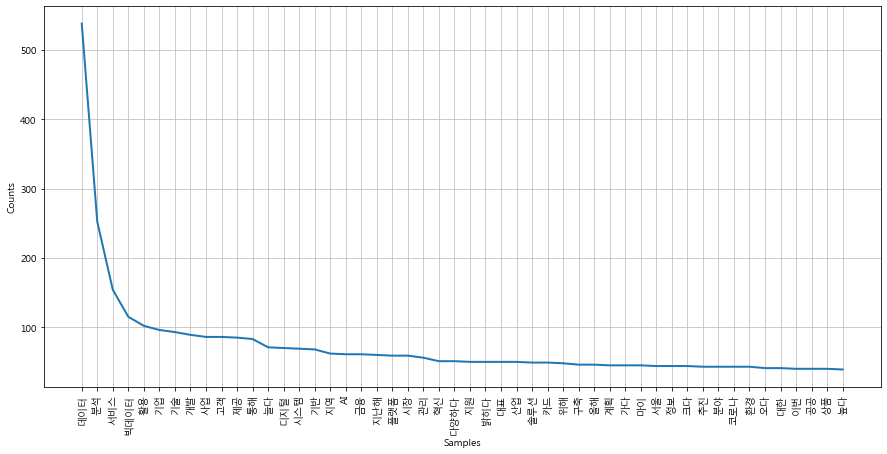

In [14]:
# nltk 라이브러리는 단어의 등장 빈도를 더욱 쉽게 셀 수 있는 .Text() 함수를 제공합니다.

word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.?(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

<br>

### 2-5) 단어 등장 빈도 시각화 (막대그래프)

In [15]:
# 막대그래프로의 시각화는 NLTK 의 함수만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화를 진행합니다.

word_frequency = nltk.?(word_cleaned) # Frequency Distribution
word_frequency

FreqDist({'데이터': 538, '분석': 252, '서비스': 154, '빅데이터': 115, '활용': 102, '기업': 96, '기술': 93, '개발': 89, '사업': 86, '고객': 86, ...})

In [16]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:50]
# result

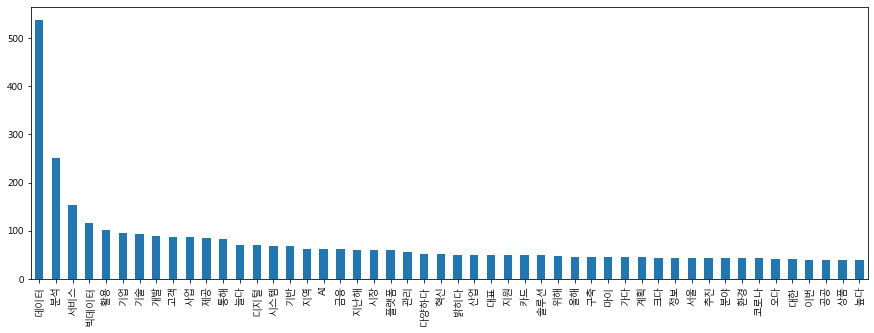

In [17]:
# 데이터프레임에 담긴 단어 및 빈도 수를 막대그래프로 표현하기 위한 코드입니다.

result.plot(kind=?, legend=False, figsize=(15,5)) # 'bar' graph
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.
# 기타 그래프 관련 옵션은 https://goo.gl/YNejGt 에서 확인하고 적용하실 수 있습니다.

plt.show()

<br>
<br>

## 3. 워드클라우드 만들기 

- 워드클라우드를 만들기에 앞서 WordCloud library 를 설치해주어야 합니다.

- [ 시작메뉴 -  모든 프로그램 - Anaconda 3 - **Anaconda Prompt** ] 에서 아래 명령어를 입력합니다. (우클릭 후 **"관리자권한으로 실행"**)
<br><br><span style="color:red;">**conda install -c https://conda.anaconda.org/conda-forge wordcloud==1.5.0</span>**
<br><br> (MacOS : **pip install wordcloud==1.5.0**)

In [18]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

#### 3-1) WordCloud - 하얀 바탕

In [19]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       # font_path="C:/Windows/Fonts/NanumSquareB.ttf" <- 나눔스퀘어 폰트가 설치되어 있을 경우
                       # font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf <- MacOS의 경우
                       
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [20]:
word_cloud.?(word_dic) # Generate wordcloud from word "frequency" data.

# word_cloud.generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수도 있습니다.

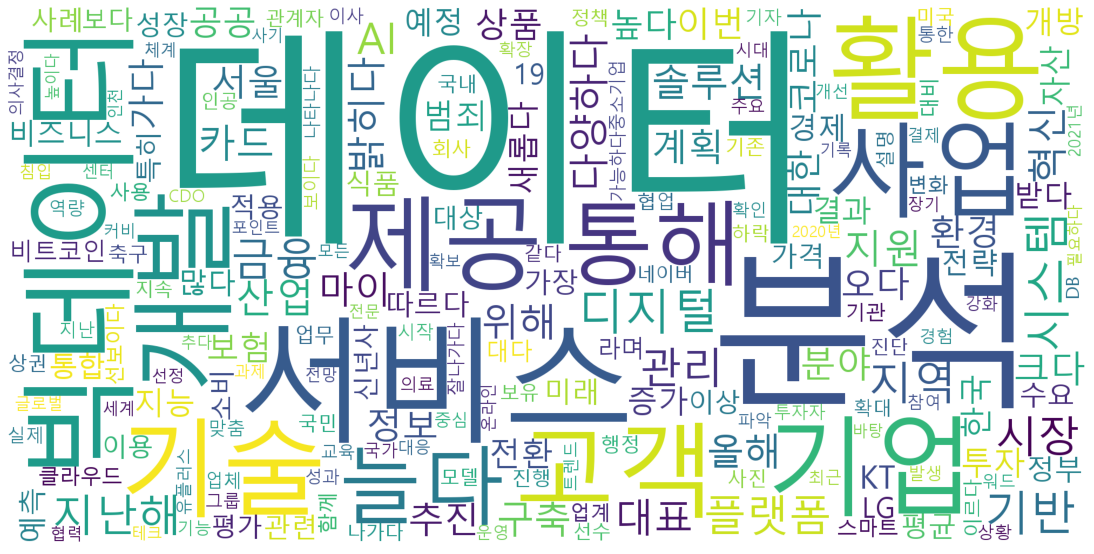

In [21]:
# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.?(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-2) WordCloud - 하얀 바탕, 최대 단어 갯수 50

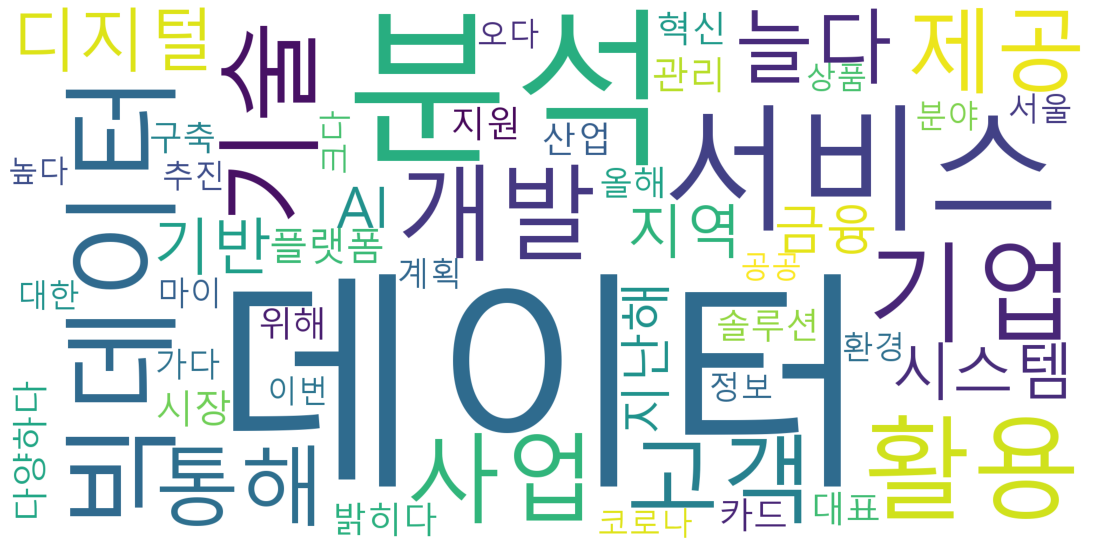

In [22]:
# max_words 라는 옵션을 통해 워드클라우드에 담길 단어의 최대 갯수를 제한할 수 있습니다.
# 기본적으로 옵션을 지정하지 않으면 200 으로 default 값이 지정되어 있습니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       ?=50, # max words
                       width=2000, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)


# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-3) WordCloud - 검정 바탕, 최대 폰트 사이즈 100

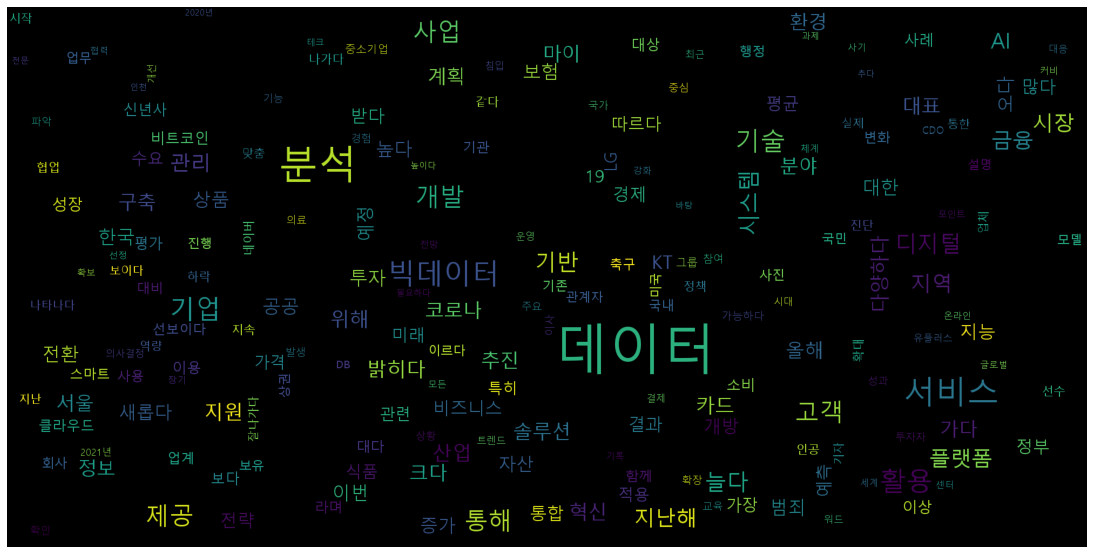

In [23]:
# max_font_size 라는 옵션을 통해 최대 글자 크기를 제한할 수 있습니다.

# 아래 옵션 중 어느 것을 지워줘야 바탕이 검정(default)이 될까요?
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       background_color='white', 
                       ?=100).generate_from_frequencies(word_dic) # Max font-size

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-4) WordCloud - masking 적용 (특정 그림 테두리 내에 워드클라우드 그리기)

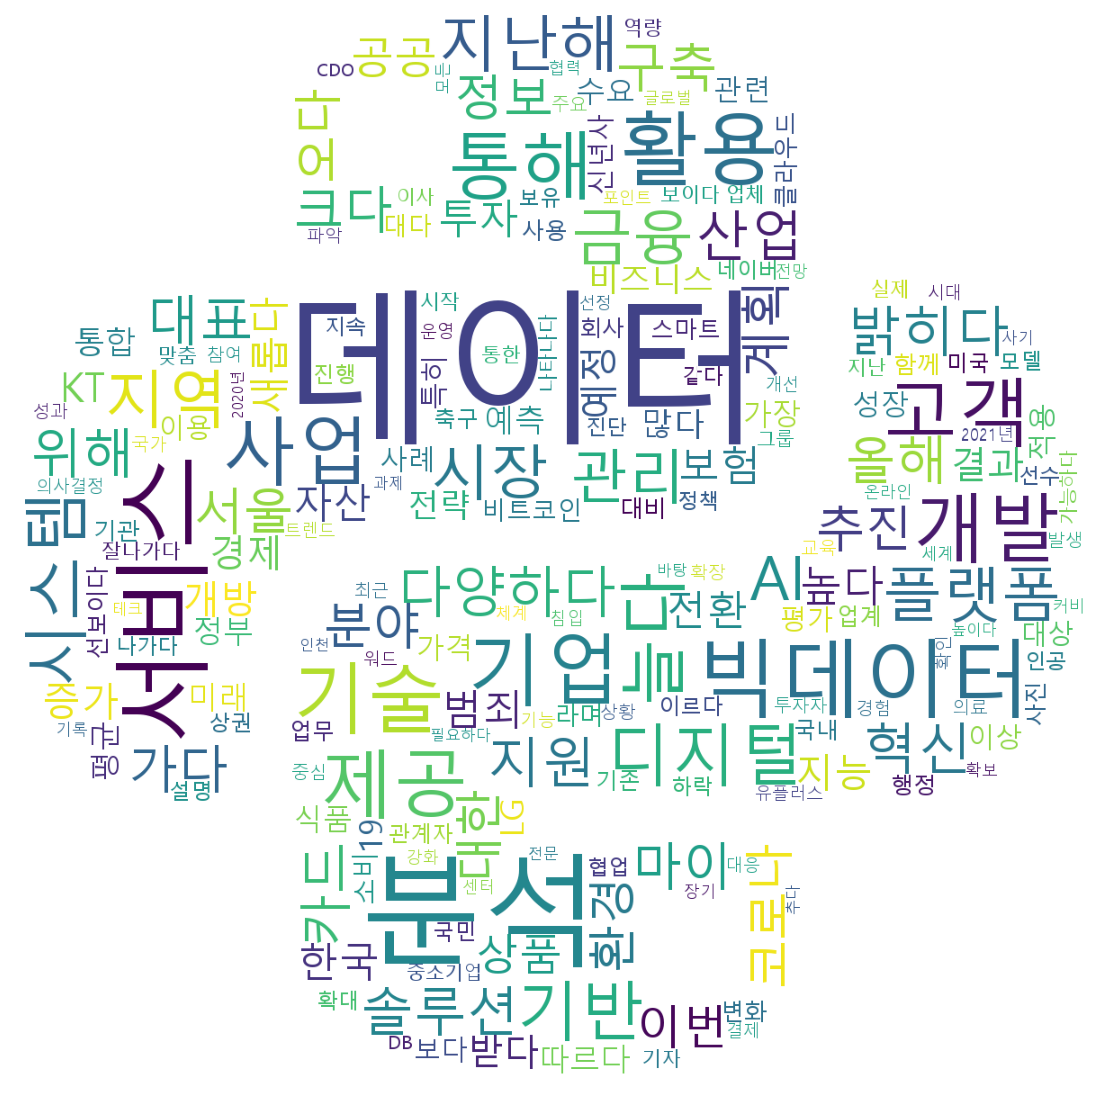

In [24]:
python_coloring = np.array(Image.open("python_mask.jpg"))

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       ?=python_coloring, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

#### 3-5) WordCloud - masking 적용 (특정 그림 테두리 내에 워드클라우드 그리기 & 그림 색상으로 전체 색상 통일)

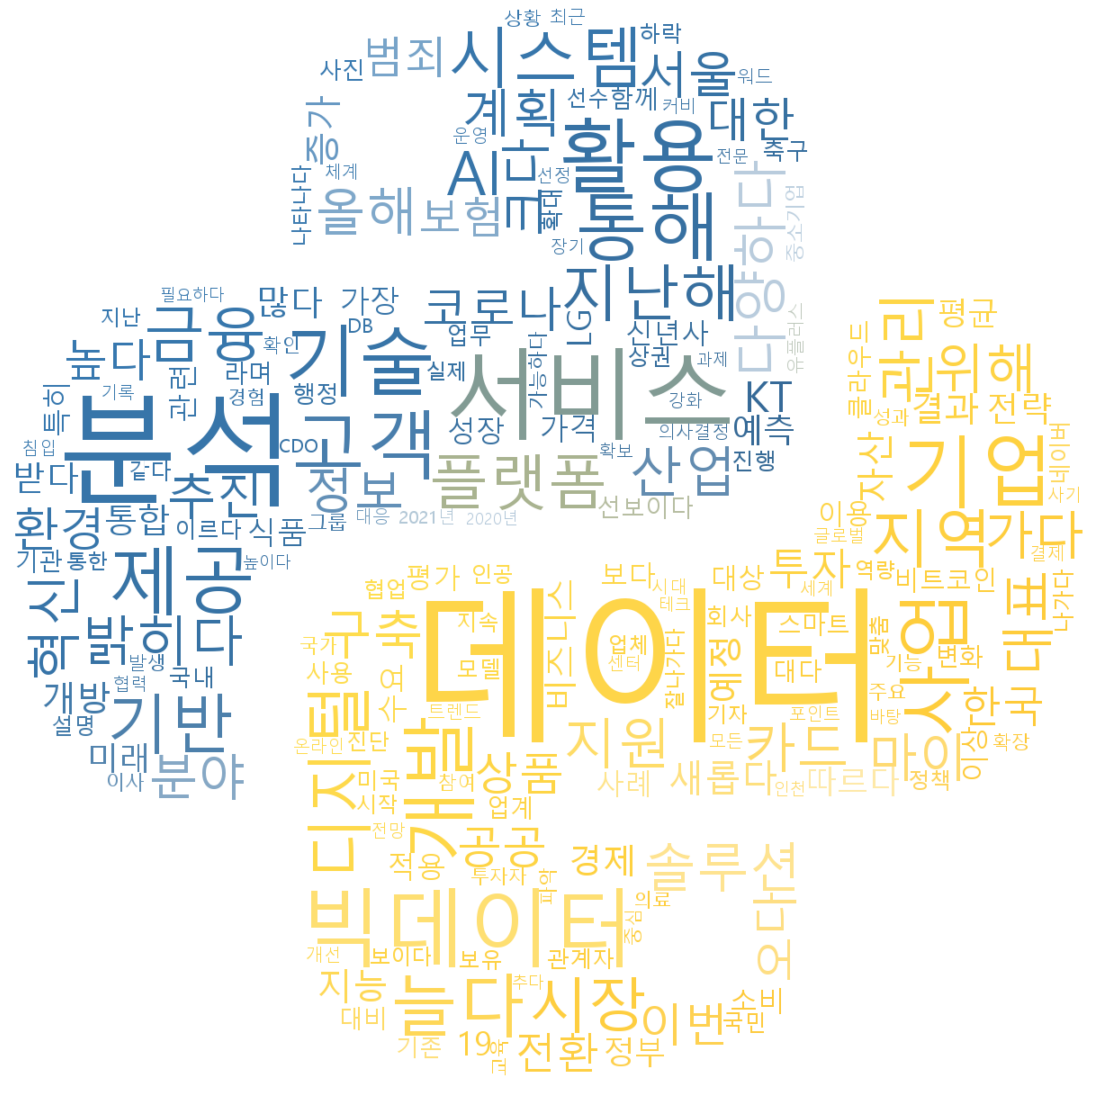

In [25]:
from wordcloud import ? # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

python_coloring = np.array(Image.open("python_mask.jpg"))
image_colors = ?(python_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=python_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.?(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.?(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>
<br>

#### 3-6) 워드클라우드를 이미지 파일로 저장하기 

In [83]:
# 아래 코드를 실행하시면 jupyter notebook 과 동일한 폴더에 워드클라우드가 이미지 파일로 저장된 것을 확인하실 수 있습니다.

word_cloud.?("word_cloud_completed.png") # Save "to file"

<br>

#### 3-7) WordCloud 요약 (완성본)

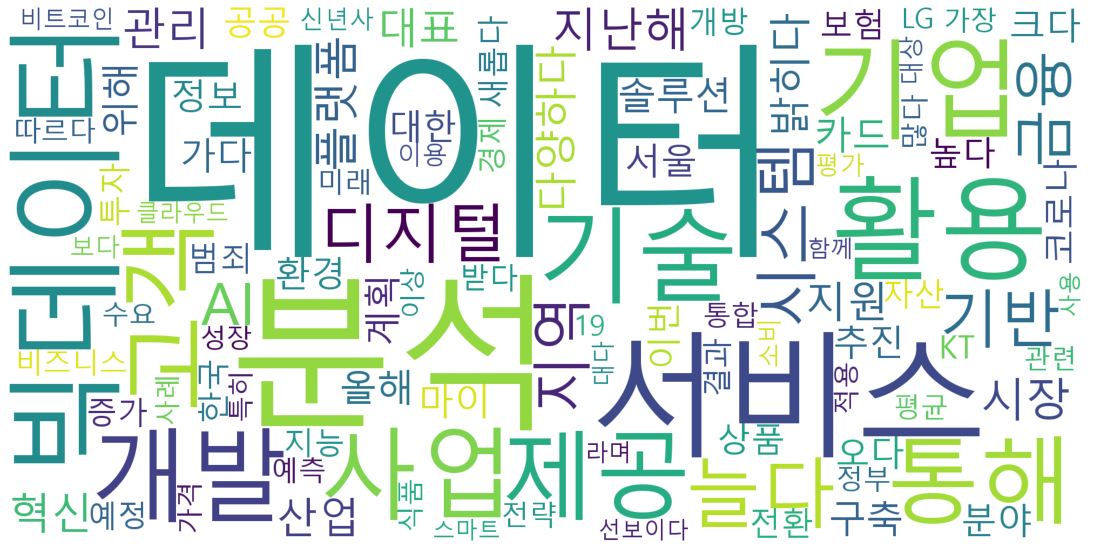

In [26]:
# 아래 옵션들을 원하시는대로 지정하셔서 가장 마음에 드는 워드클라우드를 활용하시면 됩니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # 한글 폰트 변경
                       width=2000, height=1000, # 실제 워드클라우드 크기 변경 (해상도 변경)
                       max_words=100, # 최대로 보여질 단어 수 제한
                       background_color='white', # 바탕색 지정 (주석처리할 경우 검정으로 변경됨)
#                        max_font_size=100, # 최대 단어 크기 제한
                      ).generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15)) # Jupyter notebook 상에서 보여지는 워드클라우드 크기 지정 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("word_cloud_7 (white, squared, max100).png")

<br>

#### Appendix) Try other masks!

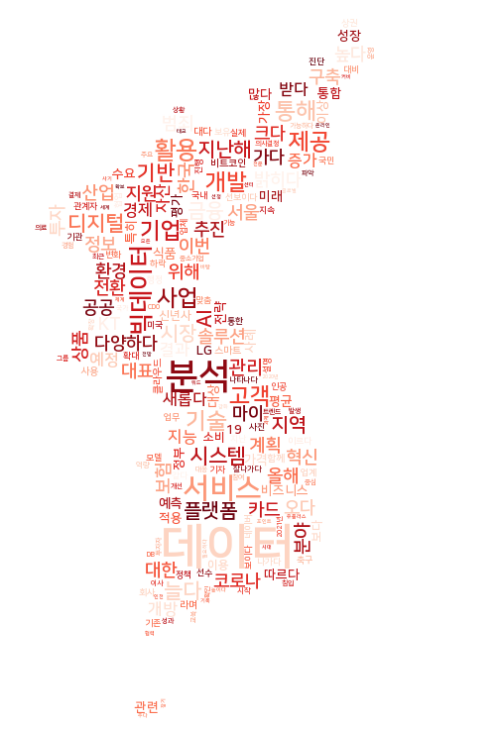

In [27]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.

korea_coloring = np.array(Image.open("other masks/korea_mask.jpg"))
# image_colors = ImageColorGenerator(korea_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       width=1600, height=1000, 
                       mask=korea_coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud.recolor(colormap=?), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
# plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("other_masks_applied.png")